In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_df_project_3_0502c.csv")
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,earliest_cr_line,tax_liens,pub_rec_bankruptcies,term,loan_amnt,credit_start_date
0,1,68000.0,15.74,0.0,750.0,0.0,0.0,0.0,11.0,0.0,14471.0,30.6,15.0,Individual,Mar-10,0.0,0.0,36,13500.0,3
1,3,110000.0,23.44,0.0,675.0,0.0,39.0,0.0,12.0,0.0,13362.0,50.8,29.0,Individual,Sep-03,0.0,0.0,36,20000.0,1
2,2,27840.0,15.99,0.0,685.0,1.0,0.0,0.0,14.0,0.0,5771.0,30.9,20.0,Individual,Nov-11,0.0,0.0,36,1600.0,3
3,2,28000.0,8.62,0.0,700.0,0.0,49.0,0.0,7.0,0.0,4132.0,18.2,17.0,Individual,Jan-10,0.0,0.0,36,6400.0,3
4,2,72500.0,29.58,0.0,680.0,0.0,47.0,0.0,9.0,0.0,27733.0,74.2,20.0,Individual,Jul-07,0.0,0.0,60,16000.0,2


In [ ]:
print(df["int_rate"].unique())

In [ ]:
print(df.shape)

In [ ]:
print(df["pub_rec_bankruptcies"].unique())

print(df["pub_rec_bankruptcies"].value_counts())

In [ ]:
df["pub_rec_bankruptcies"] = df[["pub_rec_bankruptcies"]].astype(int)
df
 

In [ ]:
#change bankruptcies to hot encoding 
df["pub_rec_bankruptcies"].replace({2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}, inplace=True)
print(df["pub_rec_bankruptcies"].value_counts())

# Stats Summary

In [ ]:
df.describe()

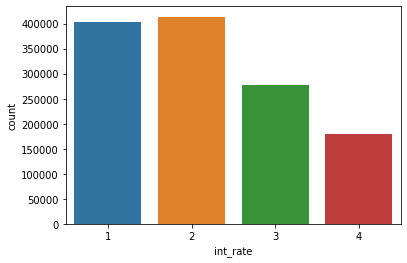

In [3]:
import seaborn as sns
sns.countplot(df["int_rate"], label="Count")
plt.show()

In [3]:
# select features which will be used as X values
test_df = df[["int_rate","annual_inc", "dti", "fico_range_low", "term",
              "open_acc", "revol_bal", "loan_amnt","pub_rec_bankruptcies", "credit_start_date"]]
test_df.head()

,int_rate,annual_inc,dti,fico_range_low,term,open_acc,revol_bal,loan_amnt,pub_rec_bankruptcies,credit_start_date
0,1,68000.0,15.74,750.0,36,11.0,14471.0,13500.0,0.0,3
1,3,110000.0,23.44,675.0,36,12.0,13362.0,20000.0,0.0,1
2,2,27840.0,15.99,685.0,36,14.0,5771.0,1600.0,0.0,3
3,2,28000.0,8.62,700.0,36,7.0,4132.0,6400.0,0.0,3
4,2,72500.0,29.58,680.0,60,9.0,27733.0,16000.0,0.0,2


In [ ]:
# the data is pretty balanced except mandarin 
from pandas.plotting import scatter_matrix 

scatter_matrix(test_df.drop("int_rate", axis=1), figsize=(30,20))
plt.show()

In [4]:
feature_names = ["annual_inc", "fico_range_low", "term", "loan_amnt"]
X = test_df[feature_names]
y = test_df["int_rate"]
X


,annual_inc,fico_range_low,term,loan_amnt
0,68000.00,750.0,36,13500.0
1,110000.00,675.0,36,20000.0
2,27840.00,685.0,36,1600.0
3,28000.00,700.0,36,6400.0
4,72500.00,680.0,60,16000.0
5,95000.00,695.0,36,4800.0
6,47000.00,695.0,60,20000.0
7,49000.00,700.0,60,12000.0
8,305000.00,770.0,36,25000.0
9,124812.00,695.0,60,24000.0


In [ ]:
y

# Create training and test sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

# Apply scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

# Build Models 

In [8]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

/Users/mayareiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mayareiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression on training 0.45135351302006455
Accuracy of logistic regression on testing 0.4507892439212829


In [9]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.7030133435508963
Accuracy of Decision tree on testing 0.41712153665446006


In [10]:
# Setting max decision tree depth to help avoid overfitting
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.46364180741987693
Accuracy of Decision tree on testing 0.4633329773936421


In [15]:
# Setting max decision tree depth to help avoid overfitting
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(max_depth=10)
dt3.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt3.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt3.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.4753040667156607
Accuracy of Decision tree on testing 0.47134476109118545


In [12]:
# Setting max decision tree depth to help avoid overfitting
dt4 = DecisionTreeClassifier(max_depth=15)
dt4.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt4.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt4.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.4950534851730181
Accuracy of Decision tree on testing 0.46556597551553675


In [13]:
# Setting max decision tree depth to help avoid overfitting
dt5 = DecisionTreeClassifier(max_depth=20)
dt5.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt5.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt5.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.5460125332646579
Accuracy of Decision tree on testing 0.4517691249536755


In [14]:
# K-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print('Accuracy of Knn on training', knn.score(X_train_scaled, y_train))
print('Accuracy of Knn on testing', knn.score(X_test_scaled, y_test))

Accuracy of Knn on training 0.5376709819119824
Accuracy of Knn on testing 0.42232558431687844


In [15]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
print('Accuracy of LDA on training', lda.score(X_train_scaled, y_train))
print('Accuracy of LDA on testing', lda.score(X_test_scaled, y_test))

Accuracy of LDA on training 0.45628537150681836
Accuracy of LDA on testing 0.45574204003693397


In [16]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.4113029695839065
Accuracy of GNB on testing 0.41134275107881135


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)
print('Accuracy of Random Forest on training', rf.score(X_train_scaled, y_train))
print('Accuracy of Random Forest on testing', rf.score(X_test_scaled, y_test))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1 = rf.fit(X_train_scaled, y_train)
rf1.score(X_test_scaled, y_test)
print('Accuracy of Random Forest on training', rf1.score(X_train_scaled, y_train))
print('Accuracy of Random Forest on testing', rf1.score(X_test_scaled, y_test))

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

In [16]:
import pickle

In [17]:
pickle.dump(dt3, open('model.pkl','wb'))

In [18]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[0.00208204, 0.21621622, 0.        , 0.30128205]]))

[1]


In [ ]:
["annual_inc", "fico_range_low", "term", "loan_amnt"]

In [15]:
X_test_scaled[36]

array([0.00213122, 0.16216216, 0.        , 0.35897436])